In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



import sys
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/drive/My Drive/DBs/dc.csv') 
df = df.rename(columns = {'Unnamed: 0' : 'Time'})
df['Time'] = pd.to_datetime(df['Time']) # IMPORTANTE YYYY-MM-DD 
df = df.iloc[::-1].set_index('Time')

df.tail(20)

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2021-01-11,143077.835008,38150.02,143508.080896,38264.74,114087.168000,30420.00,132780.924288,35404.47,249131
2021-01-12,132803.051648,35410.37,137369.651200,36628.00,122004.262400,32531.00,127705.770496,34051.24,133948
2021-01-13,127697.932160,34049.15,141952.640000,37850.00,121437.952000,32380.00,140157.623552,37371.38,124477
2021-01-14,140157.623552,37371.38,150391.040000,40100.00,137644.292992,36701.23,146807.532800,39144.50,102950
2021-01-15,146810.195584,39145.21,149069.999104,39747.76,129043.763200,34408.00,137798.021888,36742.22,118300
2021-01-16,137780.057472,36737.43,142327.680000,37950.00,132605.893120,35357.80,134995.572992,35994.98,86348
2021-01-17,134995.572992,35994.98,138211.616000,36852.50,126951.040000,33850.00,134371.618944,35828.61,80157
2021-01-18,134358.042496,35824.99,140526.850432,37469.83,130513.920000,34800.00,137381.915008,36631.27,70698
2021-01-19,137348.873984,36622.46,141952.640000,37850.00,134429.562624,35844.06,134607.444096,35891.49,79611


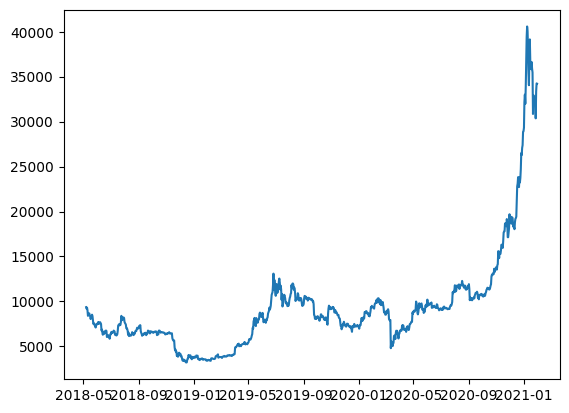

In [ ]:
df = df['close_USD'] 
plt.plot(df)
plt.show()

¿Qué se puede "observar" de la gráfica?
- No es clara la tendencia general (existen intervalos en dónde hay tendencia positiva, tendencia negativa e inclusiva intervalos de estacionariedad).
- Hay potencial ciclicidad.
- Hay temporalidad.
- Los datos se toman diaria.


In [ ]:
from matplotlib import pyplot 

df_dif = df.diff() # Esto deriva a la serie de tiempo
df_dif # ds = datos difernciados y = target


Time
2018-05-07        NaN
2018-05-08    -177.44
2018-05-09     122.44
2018-05-10    -307.80
2018-05-11    -602.20
               ...   
2021-01-26     213.57
2021-01-27   -2101.62
2021-01-28    2998.71
2021-01-29     887.34
2021-01-30     -33.66
Name: close_USD, Length: 1000, dtype: float64

In [ ]:
# Hacemos "split". Cuidado: no usamos la función de sklearn train_test_split

train = df.iloc[:-200] # las primeras 800 filas
test = df.iloc[-200:] # las últimas 200 filas

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


modelo1 = ARIMA(train, order=(2, 1, 0)).fit()

forecast = modelo1.forecast(steps=200)
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-07-15    9252.006931
2020-07-16    9252.942627
2020-07-17    9252.688291
2020-07-18    9252.752780
2020-07-19    9252.735700
                 ...     
2021-01-26    9252.739185
2021-01-27    9252.739185
2021-01-28    9252.739185
2021-01-29    9252.739185
2021-01-30    9252.739185
Freq: D, Name: predicted_mean, Length: 200, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



mae = mean_absolute_error(test, forecast)


mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)


mape = (forecast - test).abs().div(test).mean()

In [ ]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 7956.23
RMSE: 11705.11
MAPE: 0.35%


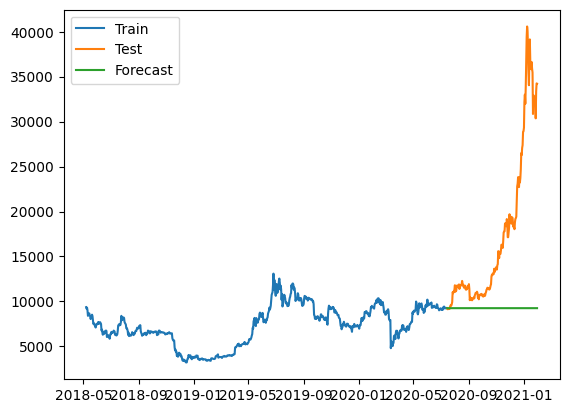

In [ ]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet 


df = df.reset_index()[["Time", "close_USD"]].rename(columns={"Time": "ds", "close_USD": "y"})


modelo2 = Prophet()

modelo2.fit(df)

future_dates = modelo2.make_future_dataframe(periods=365)

predictions = modelo2.predict(future_dates)

predictions.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_j8wp8q/faj9v5f3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_j8wp8q/55qdi0go.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33840', 'data', 'file=/tmp/tmpo_j8wp8q/faj9v5f3.json', 'init=/tmp/tmpo_j8wp8q/55qdi0go.json', 'output', 'file=/tmp/tmpo_j8wp8q/prophet_model_7j6fmpd/prophet_model-20230506003017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-07,2870.377510,5962.806300,8636.081962,2870.377510,2870.377510,4423.193002,4423.193002,4423.193002,9.209057,9.209057,9.209057,4413.983945,4413.983945,4413.983945,0.0,0.0,0.0,7293.570512
1,2018-05-08,2888.121785,5971.661732,8611.892301,2888.121785,2888.121785,4470.179806,4470.179806,4470.179806,-18.251420,-18.251420,-18.251420,4488.431227,4488.431227,4488.431227,0.0,0.0,0.0,7358.301591
2,2018-05-09,2905.866060,6200.344247,8802.889166,2905.866060,2905.866060,4581.427841,4581.427841,4581.427841,24.461161,24.461161,24.461161,4556.966680,4556.966680,4556.966680,0.0,0.0,0.0,7487.293901
3,2018-05-10,2923.610336,6251.152092,8803.199050,2923.610336,2923.610336,4607.574845,4607.574845,4607.574845,-11.063767,-11.063767,-11.063767,4618.638612,4618.638612,4618.638612,0.0,0.0,0.0,7531.185181
4,2018-05-11,2941.354611,6211.692468,8990.371313,2941.354611,2941.354611,4678.023203,4678.023203,4678.023203,5.414738,5.414738,5.414738,4672.608465,4672.608465,4672.608465,0.0,0.0,0.0,7619.377813


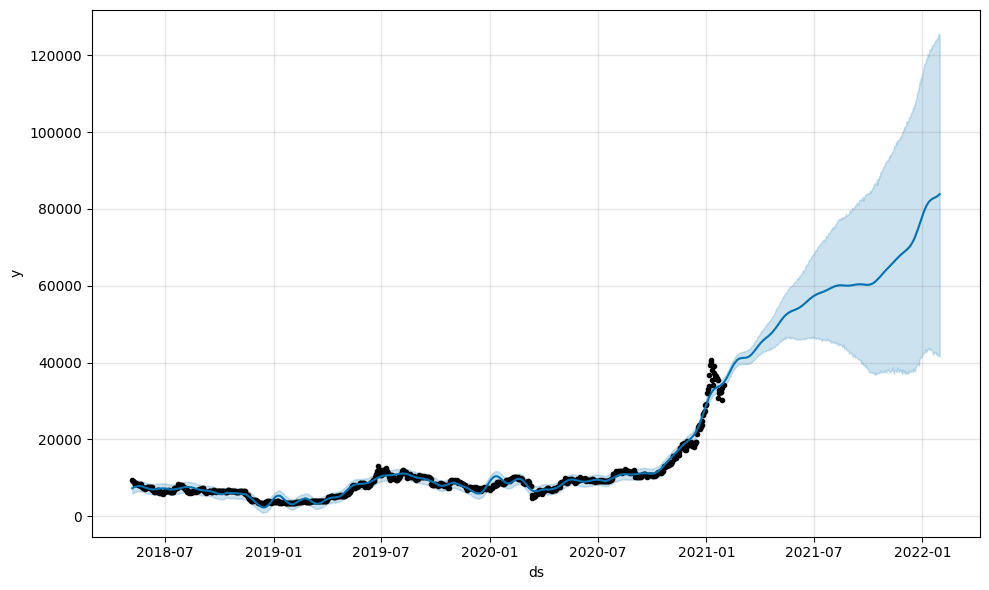

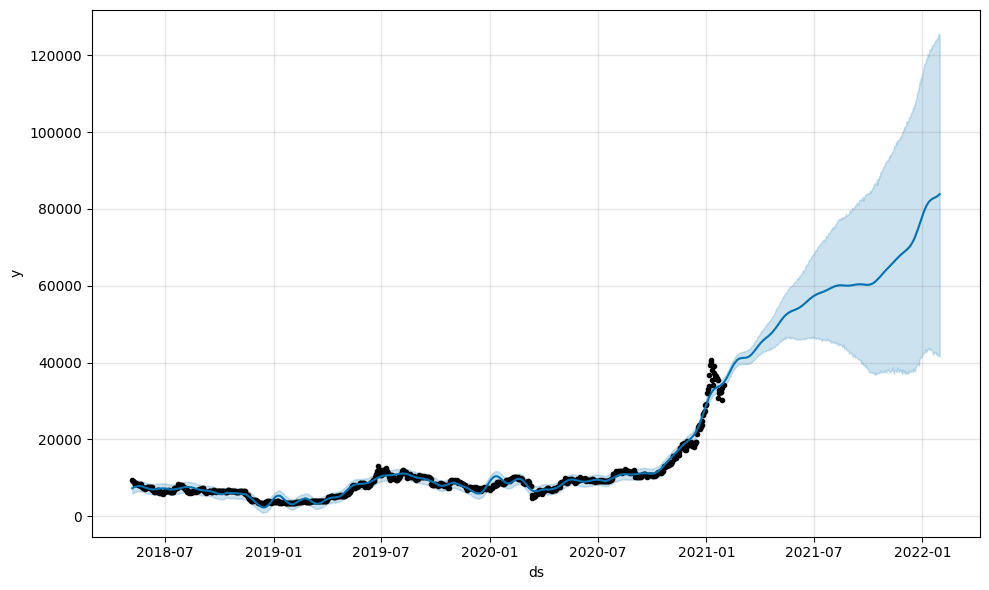

In [ ]:
modelo2.plot(predictions)